# Part II - Analyse des facteurs d'influence des voyages à vélo
## Fait par MANESSONG Vanessa



## Investigation Overview

Le but de cette présentation est de présenter comment les features tels que le genre des utilisateurs, l'âge, le type des utilisateurs, la période (jour, heure) peuvent influencer le trajet d'un voyage à vélo en terme de distance et de durée du voyage. 


## Dataset Overview

L'ensemble de données comprend des informations sur les trajets individuels effectués dans un système de partage de vélos couvrant la grande région de la baie de San Francisco sur en février 2019. Le dataset fournit des informations sur les points de départ et les points d'arrivée de chaque voyage, le sexe des utilisateurs, le temps mis pour parcourir un trajet, la date de naissance des utilisateurs.

In [25]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [27]:
# load in the dataset into a pandas dataframe
biketrips = pd.read_csv('biketrips_clean.csv')

biketrips.head(5)

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,distance,start_year_month,start_week_day,start_day_time
0,0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,...,4902,Customer,1984,Male,No,35,544.709117,2,4,17
1,1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,...,2535,Customer,1984,nogender,No,35,1743.001102,2,4,18
2,2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),...,5905,Customer,1972,Male,No,47,2704.548179,2,4,12
3,3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,...,6638,Subscriber,1989,Other,No,30,260.738838,2,4,17
4,4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,...,4898,Subscriber,1974,Male,Yes,45,2409.304132,2,4,23


In [28]:
base_color = sb.color_palette()[0]

"""
    Cette fonction permet d'afficher un visuel univarié avec un countplot pour un variable catégorielle
"""
def plot_1_ctplot(variable, xlabel, title):
    # Visualisation avec countplot char il s'agit d'une variable catégorielle
    base_color = sb.color_palette()[0]
    # Ordre dynamique des barres
    freq = biketrips[variable].value_counts()
    order_var = freq.index

    sb.countplot(data = biketrips, x = variable, order = order_var, color = base_color)
    plt.xlabel(xlabel)
    plt.title(title)
    
"""
    Cette fonction permet une visualisation bivariée à l'aide d'un scatter plot
"""
def plot_2_scatter(variable1, variable2, xlim, ylim, xlabel, ylabel, title):
    plt.scatter(data = biketrips, x = variable1, y = variable2, alpha = 1/2)
    if len(xlim) != 0 :
        plt.xlim(xlim)
    if len(ylim) != 0 :
        plt.ylim(ylim)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

## Distribution des voyages par au type d'utilisateur et au genre

Nous aimerons par ces visuels montrer la distribution du nombre d'utilisateurs qui entrennent des voyages par vélo. On s'intéresse ici au genre et au type des utiisateurs. 

On peut bien observer que les hommes effectuent plus de voyages que les femmes et les personnes d'autres genres. 

Par ailleurs, les utilisateurs de type 'subscriber' entreprennent plus de voyages que ceux de type 'customer'.

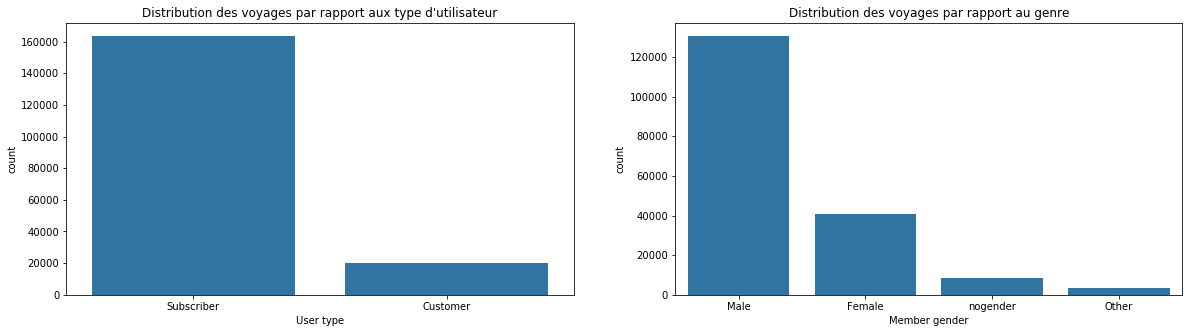

In [29]:
plt.figure(figsize = [20, 5])

# Visualisation de la variable 'user_type'
plt.subplot(1,2,1)
plot_1_ctplot('user_type', 'User type', 'Distribution des voyages par rapport aux type d\'utilisateur')

# Visualisation de la variable 'member_gender'
plt.subplot(1,2,2)
plot_1_ctplot('member_gender', 'Member gender', 'Distribution des voyages par rapport au genre')

## Distance vs Duration

Ces visuels nous renseignent que les trajets de plus longues distances ne sont pas forcément ceux avec un plus grand temps d'execution. On peut d'ailleurs observer que les voyages dont les distances sont proches de 10000m se font généralement en moins de temps par rapport aux rapport de moins de 6000m.

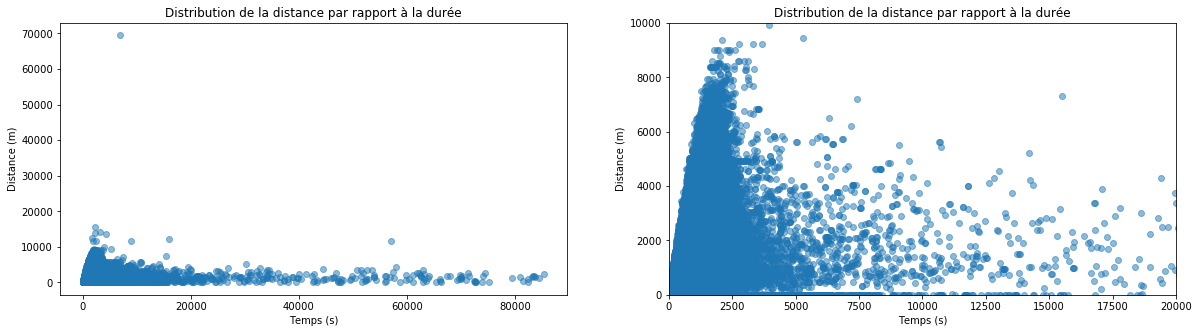

In [30]:
plt.figure(figsize = [20,5])
base_color = sb.color_palette()[0]

# Utilisation d'un scatter plot pour visualiser la distribution des variables 'duration_sec' & 'distance'
plt.subplot(1,2,1)
plot_2_scatter('duration_sec', 'distance', [], [], 'Temps (s)', 'Distance (m)', 'Distribution de la distance par rapport à la durée')

# Focus sur la zone ayant le plus de voyages 
plt.subplot(1,2,2)
plot_2_scatter('duration_sec', 'distance', [0, 20000], [0, 10000], 'Temps (s)', 'Distance (m)', 'Distribution de la distance par rapport à la durée')


## Start day vs Distance & Start time vs Distance

Les voyages de plus longues distances sont généralement entrepris du lundi au vendredi. On constate notamment une baise du nombre de voyages pendant les weekends.

En terme d'heures, on constate que les trajets les plus longs sont entrepris à partir de 5h du matin. Les pics sont totamment obsert entre 7h et 9h du matin, puis entre 16h et 18h en soirée.

Text(0.5, 1.0, 'Distribution la distance par rapport aux heures de la journée')

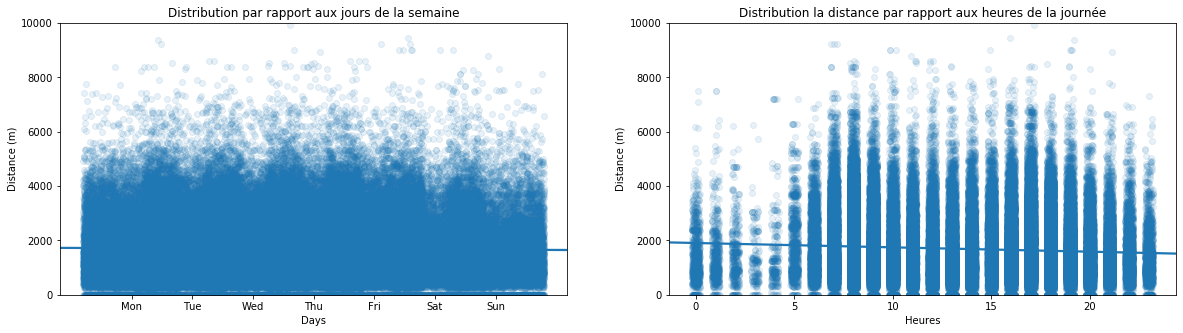

In [31]:
# Visualisation de la distance par rapport au jour et par rapport aux heures de la journée
plt.figure(figsize = [20,5])

# Utilisation de la transparence pour observer la concentration
plt.subplot(1, 2, 1)
bins_day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.regplot(data = biketrips, x = 'start_week_day', y = 'distance', truncate = False, x_jitter = 0.8, scatter_kws = {'alpha':1/10})
plt.ylim([0, 10000])
plt.xticks(range(1, len(bins_day)+1), bins_day)
plt.xlabel('Days')
plt.ylabel('Distance (m)')
plt.title('Distribution par rapport aux jours de la semaine')

# Utilisation de la transparence pour observer la concentration
plt.subplot(1, 2, 2)
sb.regplot(data = biketrips, x = 'start_day_time', y = 'distance', truncate = False, x_jitter = 0.2, scatter_kws = {'alpha':1/10})
plt.ylim([0, 10000])
plt.xlabel('Heures')
plt.ylabel('Distance (m)')
plt.title('Distribution la distance par rapport aux heures de la journée')

## Duration vs Distance vs Age

Nous voulions par cette exploration montrer l'impact que peut avoir l'âge sur la longueur et la durée d'un trajet. Mais comme l'on peut bien le constater, notre visuel nous dit qu'il n'existe pas une forte correlation entre ces trois variations. 

Text(0.5, 1, "Distribution de la distance et la durée par rapport à l'âge.")

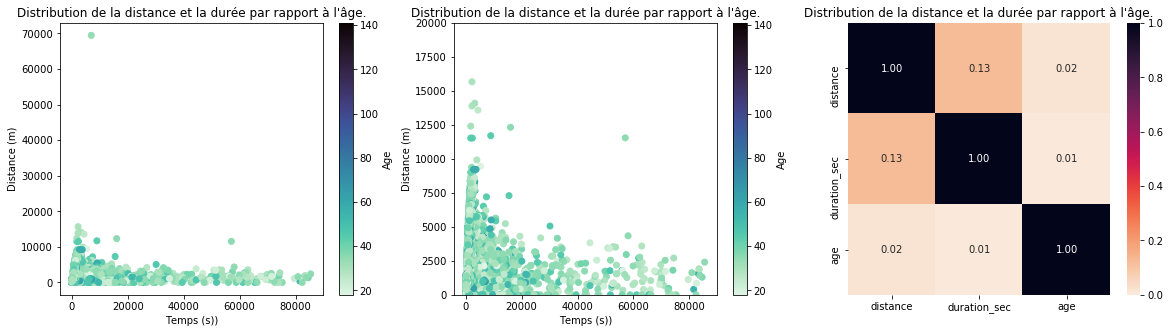

In [32]:
plt.figure(figsize = [20, 5])

plt.subplot(1,3,1)
plt.scatter(data = biketrips, x = 'duration_sec', y = 'distance', c = 'age', cmap = 'mako_r')
plt.colorbar(label = 'Age')
plt.xlabel('Temps (s))')
plt.ylabel('Distance (m)')
plt.title('Distribution de la distance et la durée par rapport à l\'âge.')

# Focus sur la zone ayant une concentration de voyages
plt.subplot(1,3,2)
plt.scatter(data = biketrips, x = 'duration_sec', y = 'distance', c = 'age', cmap = 'mako_r')
plt.ylim([0, 20000])
plt.colorbar(label = 'Age')
plt.xlabel('Temps (s))')
plt.ylabel('Distance (m)')
plt.title('Distribution de la distance et la durée par rapport à l\'âge.')

# Utilisation d'un Heatmap pour mieux observer les relations
plt.subplot(1,3,3)
bike_stats = ['distance', 'duration_sec', 'age']
sb.heatmap(biketrips[bike_stats].corr(), cmap = 'rocket_r', annot = True, fmt = '.2f', vmin = 0)
b, t = plt.ylim() 
b += 0.5
t -= 0.5 
plt.ylim(b, t)
plt.title('Distribution de la distance et la durée par rapport à l\'âge.')

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt